In [1]:
# Import modules
import numpy as np # To manipulate array
import matplotlib.pyplot as plt # To visualize 2D and 3D
from mpl_toolkits import mplot3d
from matplotlib.animation import FuncAnimation # To visualize in animation
from IPython import display # To display in html
from PIL import Image # To open Images and convert them to grayscales
import torch
%matplotlib inline

In [2]:
import os
curent = os.getcwd()
print(curent)

C:\Users\admin\Lab_training\Week9_10


# Gradient descent for functions of one variable

Given function of one variable: $f(x) = x^{2}+5\sin x$. Find the global minximum of $f(x)$.

Update gradient formula:

$x_{t+1} = x_{t}-\eta f'(x_t)$

In [3]:
def cost(x): # return function values
    return x**2+5*np.sin(x)

def grad(x): # return the derivative of f(x)
    return 2*x+5*np.cos(x)

Text(0.5, 1.0, '$f(x) = x^{2}+5\\sin x$')

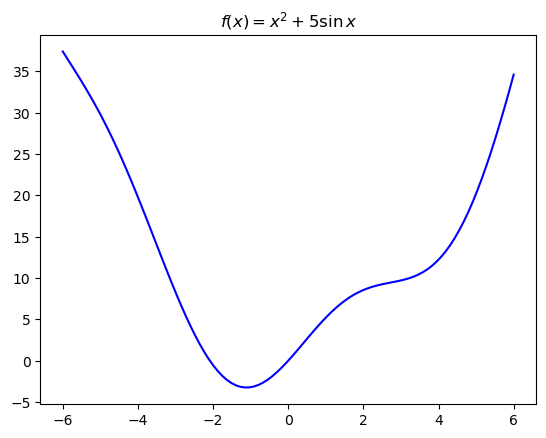

In [4]:
# Visualize
x = np.linspace(-6,6,100)
y = cost(x)
plt.plot(x,y,'b-')
plt.title('$f(x) = x^{2}+5\sin x$')

In [5]:
def myGD1(x0, eta):
    x = [x0] # store history
    for it in range(100):
        x_new = x[-1]-eta*grad(x[-1])
        if abs(grad(x_new)) < 1e-3:
            break
        x.append(x_new)
    return (x, it)

In [6]:
# x0 = 5
x1, it1 = myGD1(5, 0.1)
# x0 = -5
x2, it2 = myGD1(-5, 0.1)
print('Solution x1 = %f, cost = %f, after %d iterations' %(x1[-1], cost(x1[-1]), it1))
print('Solution x2 = %f, cost = %f, after %d iterations' %(x2[-1], cost(x2[-1]), it2))

Solution x1 = -1.110341, cost = -3.246394, after 29 iterations
Solution x2 = -1.110667, cost = -3.246394, after 11 iterations


In [7]:
# animate for x2
def animate(i, x, line):
    x_old = x[i]
    x_new = x[i+1]
    ax.clear()
    ax.set_xlim(-6,6)
    ax.plot(xx,yy,'b-')
    ax.plot(x_old, cost(x_old), marker = 's', color = 'black')
    ax.plot(x_new, cost(x_new), 'r^')
    ax.set_xlabel('x axis')
    ax.set_ylabel('y axis')
    ax.set_title('iterations = %d' %(i+1))
    line = ax.plot([x_old, x_new], [cost(x_old), cost(x_new)], linestyle = '-', linewidth = 2, color = 'black')
    return line,

xx = np.linspace(-6,6,100)
yy = cost(xx)

fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlim(-6,6)
ax.set_ylim(-6,6)
ax.set_xticks([])
line = ax.plot(xx, yy, 'b-')

x = x2
animation = FuncAnimation(fig, animate, fargs = (x, line), interval = 400, frames = len(x)-1, blit = False)
ani = animation.to_html5_video()
html = display.HTML(ani)
display.display(html)
plt.close()

In [8]:
# animate for x1
def animate(i, x, line):
    x_old = x[i]
    x_new = x[i+1]
    ax.clear()
    ax.set_xlim(-6,6)
    ax.plot(xx,yy,'b-')
    ax.plot(x_old, cost(x_old), marker = 's', color = 'black')
    ax.plot(x_new, cost(x_new), 'r^')
    ax.set_xlabel('x axis')
    ax.set_ylabel('y axis')
    ax.set_title('iterations = %d' %(i+1))
    line = ax.plot([x_old, x_new], [cost(x_old), cost(x_new)], linestyle = '-', linewidth = 2, color = 'black')
    return line,

xx = np.linspace(-6,6,100)
yy = cost(xx)

fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlim(-6,6)
ax.set_ylim(-6,6)
ax.set_xticks([])
line = ax.plot(xx, yy, 'b-')

x = x1
animation = FuncAnimation(fig, animate, fargs = (x, line), interval = 400, frames = len(x)-1, blit = False)
ani = animation.to_html5_video()
html = display.HTML(ani)
display.display(html)
plt.close()

# Gradient Descent for multivariable functions

Given a multivariable function: $z = x^2+y^2$

Find the global minimum of z

Update formula:
$\theta_{t+1} \leftarrow \theta_{t} - \eta \nabla_{\theta}f(\theta_{t})$

In [9]:
def cost(x, y):
    return x**2+y**2
def grad(x, y):
    a1 = 2*x
    a2 = 2*y
    return np.array([a1,a2])

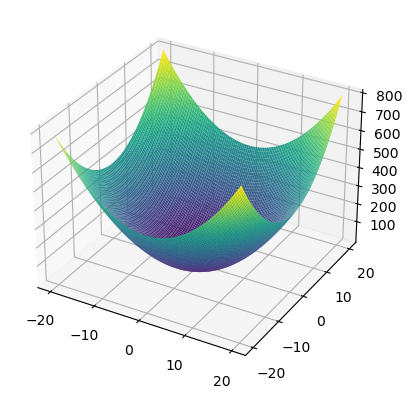

In [10]:
x = np.linspace(-20, 20, 100)
y = np.linspace(-20, 20, 100)
xx, yy = np.meshgrid(x, y)
z = cost(xx, yy)

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.plot_surface(xx, yy, z, rstride = 1, cstride = 1, cmap = 'viridis')

In [11]:
def myGD2(w_init, grad, eta):
    w = [w_init]
    for it in range(100):
        w_new = w[-1] - eta*grad(w[-1][0], w[-1][1])
        if np.linalg.norm(grad(w_new[0], w_new[1]))/len(w_new) < 1e-3:
            break
        w.append(w_new)
    return w, it

In [12]:
np.random.seed(2)
w_init = np.random.randn(2)*10
w, it = myGD2(w_init, grad, eta = 0.1)
print('Solution w = {}, cost = {}, after {} iterations'.format(w[-1], cost(w[-1][0],w[-1][1]), it))

Solution w = [-0.00108197 -0.00014608], cost = 1.191987261124481e-06, after 37 iterations


In [13]:
# animate for x1
def animate(i, w, line):
    w_old = w[i]
    w_new = w[i+1]
    ax.plot(w_old[0], w_old[1], marker = 'o', color = 'red')
    ax.plot(w_new[0], w_new[1], 'ro')    
    ax.set_title('iterations = %d' %(i+1))
    line = ax.plot([w_old[0], w_new[0]], [w_old[1], w_new[1]], linestyle = '-', linewidth = 2, color = 'black')
    return line,

x = np.linspace(-20,20,100)
y = np.linspace(-20,20,100)
xx, yy = np.meshgrid(x,y)
z = cost(xx,yy)

fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlim(-20,20)
ax.set_ylim(-20,20)
line = ax.contour(xx, yy, z, 200, cmap = 'viridis')

animation = FuncAnimation(fig, animate, fargs = (w, line), interval = 400, frames = len(w)-1, blit = False)
ani = animation.to_html5_video()
html = display.HTML(ani)
display.display(html)
plt.close()

## Linear Regression using Gradient Descent

Loss function: MSE: $L = \frac{1}{2N} ||y-\bar{X}w||_{2}^{2}$

$\nabla_{w}L(w) = \frac{1}{N} \bar{X}^{T}(\bar{X}w-y)$

We observe that,

$\bar{X}.w = w_0.\bar{X}[:,0]+w_1.\bar{X}[:,1]$

-> Cost function can be written like:

$L = y^{T}y+\bar{X_0}^{T}\bar{X_0}w_0^{2}+\bar{X_1}^{T}\bar{X_1}w_1^{2}+2\bar{X_0}\bar{X_1}w_0w_1 - 2y^{T}\bar{X_0}w_0-2y^{T}\bar{X_1}w_1$

with $\bar{X_0} = \bar{X}[:,0] = one$

$\bar{X_1} = \bar{X}[:,1]$

In [14]:
def grad(w):
    N = Xbar.shape[0]
    return 1/N*Xbar.T.dot(Xbar.dot(w)-y)

def cost(w):
    N = Xbar.shape[0]
    return .5/N*np.linalg.norm(y-Xbar.dot(w))**2

In [15]:
def myGD(w_init, grad, eta, GD_type = None):
    w = [w_init]
    for it in range(100):
        if GD_type == None:
            w_new = w[-1] - eta*grad(w[-1])
        else:
            w_new = GD_type(w[-1],grad,)
        if np.linalg.norm(grad(w_new))/len(w_new)<1e-3:
            break
        w.append(w_new)
    return w, it

In [16]:
np.random.seed(2)
X = np.random.randn(1000, 1)
y = 2 + 7*X + np.random.randn(1000, 1) # noise added

one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X.reshape(-1, 1)), axis = 1)
w_init = np.random.randn(2,1)
w, it = myGD(w_init, grad, eta = 0.1)
print('Solution w = {}, cost = {}, after {} iterations'.format(w[-1], cost(w[-1]), it))

Solution w = [[1.98766612]
 [6.98633031]], cost = 0.4744735393487738, after 76 iterations


In [17]:
# animate for x1
def animate(i, w, line):
    w_old = w[i]
    w_new = w[i+1]
    ax.plot(w_old[0], w_old[1], marker = 'o', color = 'red')
    ax.plot(w_new[0], w_new[1], 'ro')    
    ax.set_title('iterations = %d' %(i+1))
    line = ax.plot([w_old[0], w_new[0]], [w_old[1], w_new[1]], linestyle = '-', linewidth = 2, color = 'black')
    return line,

N = X.shape[0]

# compute pars for ellipse
a1 = np.linalg.norm(y, 2)**2/N
b1 = 2*np.sum(X)/N
c1 = np.linalg.norm(X, 2)**2/N
d1 = -2*np.sum(y)/N 
e1 = -2*X.T.dot(y)/N


xg = np.linspace(0, 5, 100)
yg = np.linspace(0, 10, 100)
Xg, Yg = np.meshgrid(xg, yg)
# Z = np.linalg.norm(Xg*Xbar[:, 0] + Yg*Xbar[:, 1] - y)**2
Z = a1 + Xg**2 +b1*Xg*Yg + c1*Yg**2 + d1*Xg + e1*Yg

fig = plt.figure()
ax = fig.add_subplot()
ax.axis([0, 5, 0, 10])
line = ax.contour(Xg, Yg, Z, 100, cmap = 'viridis')

animation = FuncAnimation(fig, animate, fargs = (w, line), interval = 400, frames = len(w)-1, blit = False)
ani = animation.to_html5_video()
html = display.HTML(ani)
display.display(html)
plt.close()

## Gradient Descent with Momentum

$v_t = \gamma v_{t-1}+\eta \nabla_{\theta}J(\theta)$

$\theta \leftarrow \theta -v_t = \theta - \gamma v_{t-1}-\eta \nabla_{\theta}J(\theta)$

$\gamma = 0.9$

In [18]:
def GD_momentum(theta_init, grad, eta, gamma = 0.9):
    theta = [theta_init]
    v_old = np.zeros_like(theta_init)
    for it in range(100):
        v_new = gamma*v_old + eta*grad(theta[-1])
        theta_new = theta[-1]-v_new
        if np.linalg.norm(grad(theta_new))/np.array(theta_init).size <1e-3:
            break
        theta.append(theta_new)
        v_old = v_new
    return theta, it

In [19]:
w, it = GD_momentum(w_init, grad, eta = 0.1)
print('Solution w = {}, cost = {}, after {} iterations'.format(w[-1], cost(w[-1]), it))

Solution w = [[1.97096193]
 [6.97435591]], cost = 0.4747150855833705, after 99 iterations


In [20]:
# animate for x1
def animate(i, w, line):
    w_old = w[i]
    w_new = w[i+1]
    ax.plot(w_old[0], w_old[1], marker = 'o', color = 'red')
    ax.plot(w_new[0], w_new[1], 'ro')    
    ax.set_title('iterations = %d' %(i+1))
    line = ax.plot([w_old[0], w_new[0]], [w_old[1], w_new[1]], linestyle = '-', linewidth = 2, color = 'black')
    return line,

N = X.shape[0]

# compute pars for ellipse
a1 = np.linalg.norm(y, 2)**2/N
b1 = 2*np.sum(X)/N
c1 = np.linalg.norm(X, 2)**2/N
d1 = -2*np.sum(y)/N 
e1 = -2*X.T.dot(y)/N


xg = np.linspace(0, 5, 100)
yg = np.linspace(0, 10, 100)
Xg, Yg = np.meshgrid(xg, yg)
# Z = np.linalg.norm(Xg*Xbar[:, 0] + Yg*Xbar[:, 1] - y)**2
Z = a1 + Xg**2 +b1*Xg*Yg + c1*Yg**2 + d1*Xg + e1*Yg

fig = plt.figure()
ax = fig.add_subplot()
ax.axis([0, 5, 0, 10])
line = ax.contour(Xg, Yg, Z, 100, cmap = 'viridis')

animation = FuncAnimation(fig, animate, fargs = (w, line), interval = 400, frames = len(w)-1, blit = False)
ani = animation.to_html5_video()
html = display.HTML(ani)
display.display(html)
plt.close()

## Nesterov accelerated gradient

$v_t = \gamma v_{t-1}+\eta \nabla_{\theta}J(\theta-\gamma v_{t-1})$

$\theta \leftarrow \theta - v_t$

In [21]:
def GD_NAG(theta_init, grad, eta, gamma = 0.9):
    theta = [theta_init]
    v_old = np.zeros_like(theta_init)
    for it in range(100):
        v_new = gamma*v_old + eta*grad(theta[-1]-gamma*v_old)
        theta_new = theta[-1]-v_new
        if np.linalg.norm(grad(theta_new))/np.array(theta_init).size<1e-3:
            break
        theta.append(theta_new)
        v_old = v_new
    return theta, it

In [22]:
w, it = GD_NAG(w_init, grad, eta = 0.1)
print('Solution w = {}, cost = {}, after {} iterations'.format(w[-1], cost(w[-1]), it))

Solution w = [[1.9904156 ]
 [6.98955762]], cost = 0.47447332578625606, after 73 iterations


In [23]:
# animate for x1
def animate(i, w, line):
    w_old = w[i]
    w_new = w[i+1]
    ax.plot(w_old[0], w_old[1], marker = 'o', color = 'red')
    ax.plot(w_new[0], w_new[1], 'ro')    
    ax.set_title('iterations = %d' %(i+1))
    line = ax.plot([w_old[0], w_new[0]], [w_old[1], w_new[1]], linestyle = '-', linewidth = 2, color = 'black')
    return line,

N = X.shape[0]

# compute pars for ellipse
a1 = np.linalg.norm(y, 2)**2/N
b1 = 2*np.sum(X)/N
c1 = np.linalg.norm(X, 2)**2/N
d1 = -2*np.sum(y)/N 
e1 = -2*X.T.dot(y)/N


xg = np.linspace(0, 5, 100)
yg = np.linspace(0, 10, 100)
Xg, Yg = np.meshgrid(xg, yg)
# Z = np.linalg.norm(Xg*Xbar[:, 0] + Yg*Xbar[:, 1] - y)**2
Z = a1 + Xg**2 +b1*Xg*Yg + c1*Yg**2 + d1*Xg + e1*Yg

fig = plt.figure()
ax = fig.add_subplot()
ax.axis([0, 5, 0, 10])
line = ax.contour(Xg, Yg, Z, 100, cmap = 'viridis')

animation = FuncAnimation(fig, animate, fargs = (w, line), interval = 400, frames = len(w)-1, blit = False)
ani = animation.to_html5_video()
html = display.HTML(ani)
display.display(html)
plt.close()

## Stochastic Gradient Descent

$\theta \leftarrow \theta - \eta \nabla_{\theta}J(\theta;\textbf{x}_i;\textbf{y}_i)$

In [24]:
# single point gradient
def sgrad(x,y,theta):
    return np.dot(x.T,x.dot(theta)-y)

def SGD(theta_init, grad, eta):
    theta = [theta_init]
    loss = [cost(theta_init)]
    N = X.shape[0]
    it = 0
    for epoch in range(10):
        # shuffle data
        rd_id = np.random.permutation(N)
        for i in range(N):
            idx = rd_id[i]
            g = sgrad(Xbar[idx].reshape((1,-1)), y[idx], theta[-1])
            theta_new = theta[-1] - eta*g
            if np.linalg.norm(g)/np.array(theta_init).size<1e-3:
                return theta, epoch, it, loss
            theta.append(theta_new)
            loss.append(cost(theta_new))
            it+=1
    return theta, epoch, it, loss

In [25]:
w, ep, it, loss = SGD(w_init, sgrad, eta = 0.1)
print('Solution w = {}, cost = {}, after {} epochs and {} iterations'.format(w[-1], cost(w[-1]), ep, it))

Solution w = [[1.97313931]
 [7.41283398]], cost = 0.5660343933189714, after 0 epochs and 936 iterations


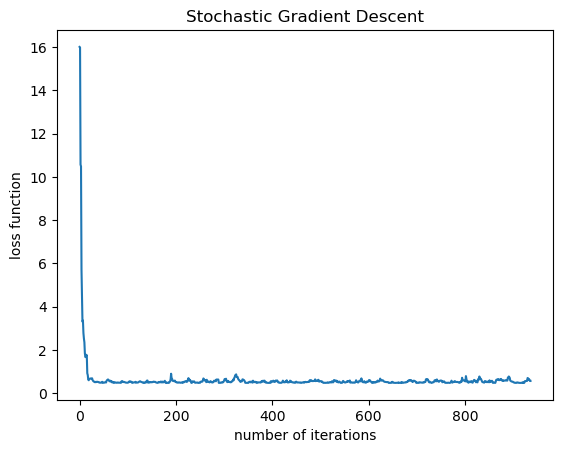

In [26]:
plt.plot(loss)
plt.xlabel('number of iterations')
plt.ylabel('loss function')
plt.title('Stochastic Gradient Descent');

## Mini-batch gradient descent

In [27]:
def mgrad(X,y,theta):
    N = X.shape[0]
    return 1./N*np.dot(X.T,X.dot(theta)-y)

def MGD(theta_init, grad, eta, batch_size = 10):
    theta = [theta_init]
    loss = [cost(theta_init)]
    N = X.shape[0] 
    it = 0
    for epoch in range(10):
        # shuffle data
        rd_id = np.random.permutation(N)
        for i in range(0, N, batch_size):
            indices = rd_id[i:min(i+batch_size,N)]
            Xi = Xbar[indices]
            yi = y[indices]
            g = mgrad(Xi,yi,theta[-1])
            theta_new = theta[-1] - eta*g
            if np.linalg.norm(g)/np.array(theta_init).size<1e-3:
                return theta, epoch, it, loss
            theta.append(theta_new)
            loss.append(cost(theta_new))
            it+=1
    return theta, epoch, it, loss

In [28]:
w, ep, it, loss = MGD(w_init, sgrad, eta = 0.1)
print('Solution w = {}, cost = {}, after {} epochs and {} iterations'.format(w[-1], cost(w[-1]), ep, it))

Solution w = [[1.97679479]
 [6.96853658]], cost = 0.474727960842398, after 9 epochs and 1000 iterations


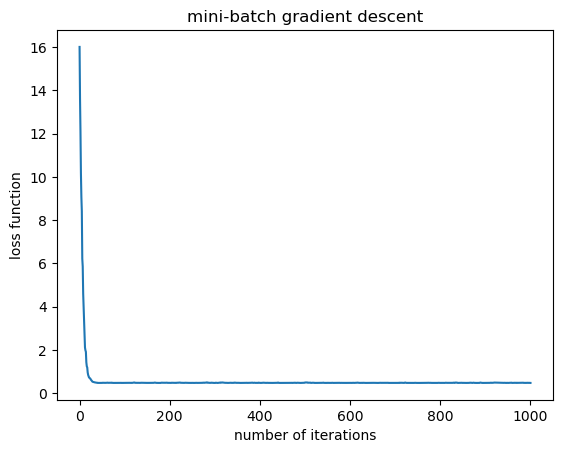

In [29]:
plt.plot(loss)
plt.xlabel('number of iterations')
plt.ylabel('loss function')
plt.title('mini-batch gradient descent');